
<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/ppgold_cover.jpeg" width="1000" alt="PPGOLD Data Science: INTRO"  />
</p>

# Data Science 01

# Análise Descritiva
Tempo estimado: **60** minutos


## Objetivos



Após completar essa aula você será capaz de :
* Desenvolver uma tabela de frequências

* Calcular medidas de tendência central: 
    * Média
    * Moda
    * Mediana  
    * Medidas Separatrizes
    * Box Plot

* Calcular medidas de dispersão
    * Desvio padrão
    * Variância 
    * Coeficiente de variação

* Desenvolver Gráficos:
    * Variáveis Qualitativas
        * Barras
        * Pizza
    * Variáveis Quantitativas
        * Colunas
        * Scatter
        * Linha
        * Histograma
        * Densidade

* Analisar Correlações   

## Bibliotecas

In [7]:
# importando a biblioteca pandas para manipulação de dados
import pandas as pd

# importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline

## Obtenção dos dados
* Vamos usar um arquivo que já sofreu um pré processamento dos dados.

In [8]:
# O objeto ainda está vazio.
caminho = ""  

# O passando o caminho em formato de string para o objeto
caminho = "https://raw.githubusercontent.com/EduPekUfpr/PPGOLD7037/main/Data/MeuAutoLimpo.csv" 

# Criando um dataframe com os dados obtidos do caminho
df = pd.read_csv(caminho) 

* Visualizando as primeiras linhas e a estrutura do dataframe

In [9]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Informações sobre o DF

In [39]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

## Tabela de Frequências

* Vamos escolher uma variável que contenha apena valores qualitativos
* Para essa aula usaremos a `make`.
* Primeiro vou passar essa variável para um objeto chamado `df_make`

In [10]:
# Criando um dataframe apenas com a columa make
df_make= df['make'].to_frame()

# Visualizando as primeiras linhas do novo dataframe
df_make.head()

,make
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi


* Agora vamos criar um novo dataframe `df_make_freq` com a frequência simples dos valores
* Será usado o método `.value_counts()` 

In [11]:
# Criando um novo dataframe passando apenas a frequência simples
df_make_freq = pd.DataFrame({'freq':df_make['make'].value_counts()})

# Visualizando as primeiras linhas do novo dataframe
df_make_freq.head()

,freq
make,
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13


* Vamos adicionar ao dataframe `.df_make_freq` a frequência acumulada
* Para isso será usado o método `.cumsum()`  do dataframe

In [12]:
# Criando a coluna com as frequências acumuladas
df_make_freq['freq ac'] = df_make_freq.cumsum()

# Visualizando as 10 primeiras linhas do dataframe
df_make_freq.head(10)

,freq,freq ac
make,,
toyota,32,32
nissan,18,50
mazda,17,67
mitsubishi,13,80
honda,13,93
subaru,12,105
volkswagen,11,116
peugot,11,127
volvo,10,137


* Agora adicionaremos uma nova coluna ao `df_make_freq` com a frequência relativa
* Para isso será usado a frequencia simples dividido pela soma total das frequências

In [13]:
# Criando a nova coluna com as frequências relativas
df_make_freq['freq rel'] = df_make_freq['freq'] / df_make_freq['freq'].sum()

# Visualizando as 10 primeiras linhas do dataframe
df_make_freq.head(10)

,freq,freq ac,freq rel
make,,,
toyota,32,32,0.159204
nissan,18,50,0.089552
mazda,17,67,0.084577
mitsubishi,13,80,0.064677
honda,13,93,0.064677
subaru,12,105,0.059701
volkswagen,11,116,0.054726
peugot,11,127,0.054726
volvo,10,137,0.049751


* Por fim para terminar a criação da nossa tabela de frequências vamos adicionar a frequência relativa acumulada
* Para isso usamos novamente o método `.cumsum()`

In [14]:
# Criando a coluna com a soma das frequências acumuladas
df_make_freq['freq rel ac'] = df_make_freq['freq rel'].cumsum()

# Visualizando as 10 primeiras linhas do dataframe
df_make_freq.head(10)

,freq,freq ac,freq rel,freq rel ac
make,,,,
toyota,32,32,0.159204,0.159204
nissan,18,50,0.089552,0.248756
mazda,17,67,0.084577,0.333333
mitsubishi,13,80,0.064677,0.398010
honda,13,93,0.064677,0.462687
subaru,12,105,0.059701,0.522388
volkswagen,11,116,0.054726,0.577114
peugot,11,127,0.054726,0.631841
volvo,10,137,0.049751,0.681592


## Medidas de Tendência Central

* Para o cálculo das medidas de tendência central vamos escolher uma variável quantitativa.
* Vamos escolher a variável `price`.

* Calculando a média
* Para isso será usado o método `.mean()` 

In [15]:
# Calculando a média
media = df['price'].mean()

# Printando a média com precisão de duas cadas decimais
print('- Média da variável price: {:.2f}'.format(media))

- Média da variável price: 13207.13


* Encontrando as modas
* para isso usamos o método `.mode()` 

In [16]:
# Calculando os valores que mais aparecem
moda = df['price'].mode()

# Printando os valores
print('Os valores mais frequentes são:\n' , moda)

Os valores mais frequentes são:
 0      5572.0
1      6229.0
2      6692.0
3      7295.0
4      7609.0
5      7775.0
6      7898.0
7      7957.0
8      8495.0
9      8845.0
10     8921.0
11     9279.0
12    13499.0
13    16500.0
14    18150.0
Name: price, dtype: float64


* Encontrando a mediana
* Para isso usaremos o método `.median()` 

In [17]:
# Calculando a mediana
mediana = df['price'].median()

# Printando o valor da mediana com precisão de duas casas decimais
print('- Mediana da variável price: {:.2f}'.format(mediana))

- Mediana da variável price: 10295.00


* Encontrando os quartis
* Para isso usaremos o método `.quantile()`

In [18]:
# Calculando o primeiro quartil, seu valor representa que 25% dos dados estão entre o mínimo e ele.
Q1 = df['price'].quantile(0.25)
print('- Primeiro Quartil da variável price: {:.2f}'.format(Q1))

# Calculando o primeiro quartil, seu valor representa que 50% dos dados estão entre o mínimo e ele.
Q2 = df['price'].quantile(0.5)
print('- Segundo Quartil da variável price: {:.2f}'.format(Q2))

# Calculando o primeiro quartil, seu valor representa que 75% dos dados estão entre o mínimo e ele.
Q3 = df['price'].quantile(0.75)
print('- Terceiro Quartil da variável price: {:.2f}'.format(Q3))

- Primeiro Quartil da variável price: 7775.00
- Segundo Quartil da variável price: 10295.00
- Terceiro Quartil da variável price: 16500.00


## Gráfico de box plot 

* Usaremos a função `.plot()` do dataframe
* O parâmetro `kind` é usado para especificar o tipo do gráfico
* O parâmetro `figsize` é usado para especificar as medidas da área de plotagem do gráfico

<Axes: >

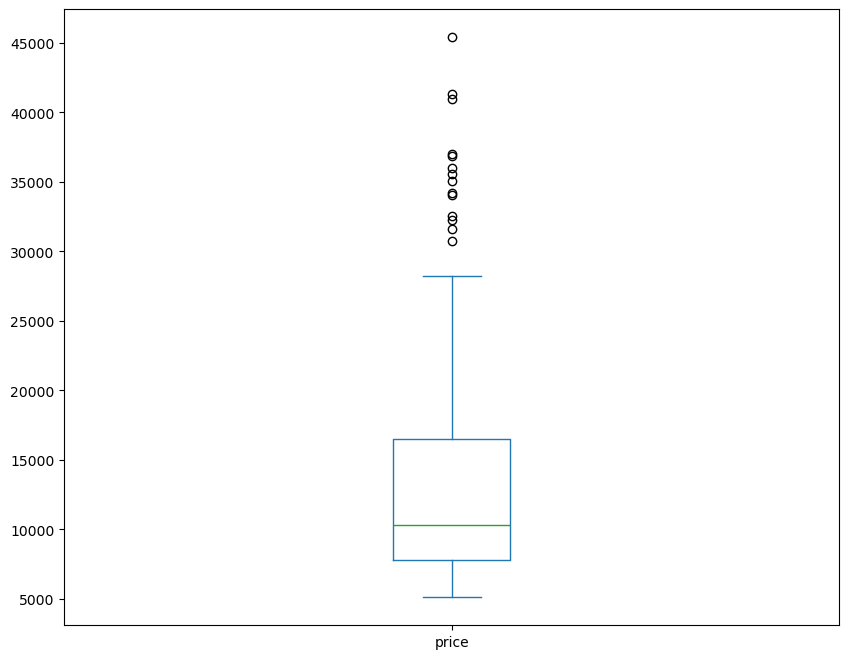

In [19]:
# Criando um gráfico de boxplot
df['price'].plot(kind='box',figsize=(10,8))

## Medidas de Dispersão

* Continuaremos usando a variável `price`  para calcular as medidas de dispersão.

**Desvio Padrão Amostral**
* Iniciamos calulando o desvio padrão com o método `.std()` 
* Como parâmetro usamos `ddof=1` pois queremos calcular o desvio padrão amostral.

In [20]:
# Calculando o desvio padrão amostral
s=df['price'].std(ddof=1)

# printando o desvio padrão amostral
print('O desvio padrão amostral é: %.2f' % s)

O desvio padrão amostral é: 7947.07


**Variância amostral**

* Calculando a variância amostral com o método `.var()`

In [21]:
# Calculando a variância amostral
s2 = df['price'].var(ddof=1)

# Printando a variância amostral
print('A variância amostral é: %.2f' % s2)

A variância amostral é: 63155863.44


**Coeficiente de Variação**

* A formula é dada por:
$$CV = \frac{s}{\bar{X}} * 100 $$

In [22]:
# Calculando o coeficiente de variação amostral
CV = s/media * 100

# Printando o coeficiente de variação amostral
print('O coeficiente de  variânção amostral é: %.2f' % CV)

O coeficiente de  variânção amostral é: 60.17


## Gráficos

**Estilo**

In [23]:
# Visualizando os estilos de gráficos disponibilizados pelo matplotlib
print(plt.style.available)

# Usando um estilo
mpl.style.use(['seaborn-v0_8-white']) 

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Variáveis Qualitativas
**Gráfico de barras**
* Vamos avaliar a frequência da coluna `make` já calculada anteriormente
* Para usaramos o método `.plot()`
* Nesse método temos os seguintes parâmetros:
    * `kind=bar` para espeficicar que é um gráfico de barras
    * `figsize=(15,8)` para espeficicar largura e altura da área de plotagem
    * `xlabel=Fabricante` para espeficicar o título do eixo x do gráfico
    * `ylabel=Quantidade` para espeficicar o título do eixo y do gráfico

<Axes: title={'center': 'Frequência por fabricante'}, xlabel='Fabricante', ylabel='Quantidade'>

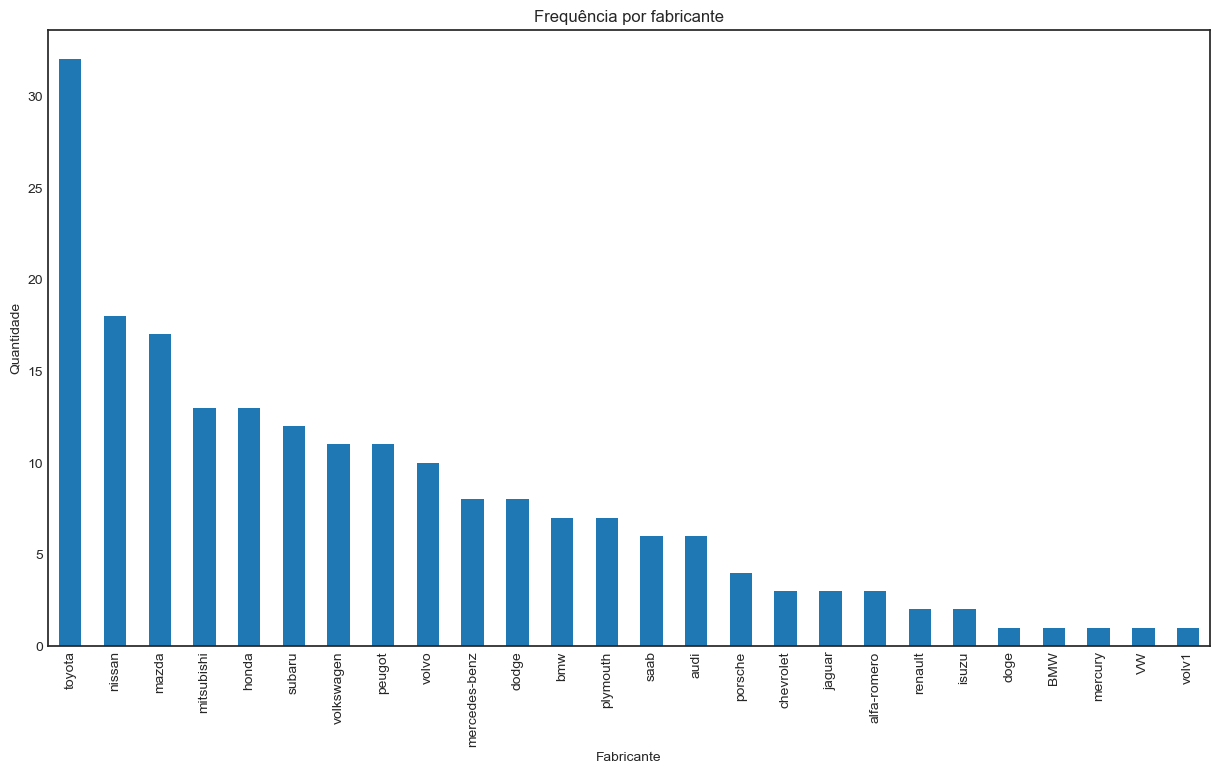

In [24]:
df_make_freq['freq'].plot(
                            kind='bar'
                            ,figsize=(15,8)
                            ,title='Frequência por fabricante'
                            ,xlabel='Fabricante'
                            ,ylabel='Quantidade'
                        )

**Gráfico de Pizza**
* Vamos analisar o top 5 fabricantes em um gráfico de pizza
* Para isso usaremos o método `.head(5)`  
* Criando um dataframe chamado `df_make_top` 

In [25]:
# Criando um novo dataframe
df_make_top = df_make_freq.head(5)

# Mostrando as linhas do dataframe
df_make_top

,freq,freq ac,freq rel,freq rel ac
make,,,,
toyota,32,32,0.159204,0.159204
nissan,18,50,0.089552,0.248756
mazda,17,67,0.084577,0.333333
mitsubishi,13,80,0.064677,0.398010
honda,13,93,0.064677,0.462687


* Para usaramos o método `.plot()`
* Nesse método temos os seguintes parâmetros:
    * `kind=pie` para espeficicar que é um gráfico de pizza
    * `title=Top 5 Frabricantes` para espeficicar o título do gráfico
    * `figsize=(10,16)` para espeficicar largura e altura da área de plotagem
    * `autopct=%.2f%%` para espeficicar que os rótulos dos dados serão apresentados com duas cadas decimais em percentuais
    * `pctdistance=1.12` para definir a distância entre o centro da fatia e o texto da porcentagem exibido fora dela,
    * `startangle=90` para definir o ângulo inicial da primeira fatia do gráfico, em graus. O ângulo de 90 graus indica que a primeira fatia do gráfico começa na posição superior do círculo e se move no sentido anti-horário.
    * `shadow=True` para colocar uma sombra no gráfico
    * `labels=None` Remove os rotulos do gráfico

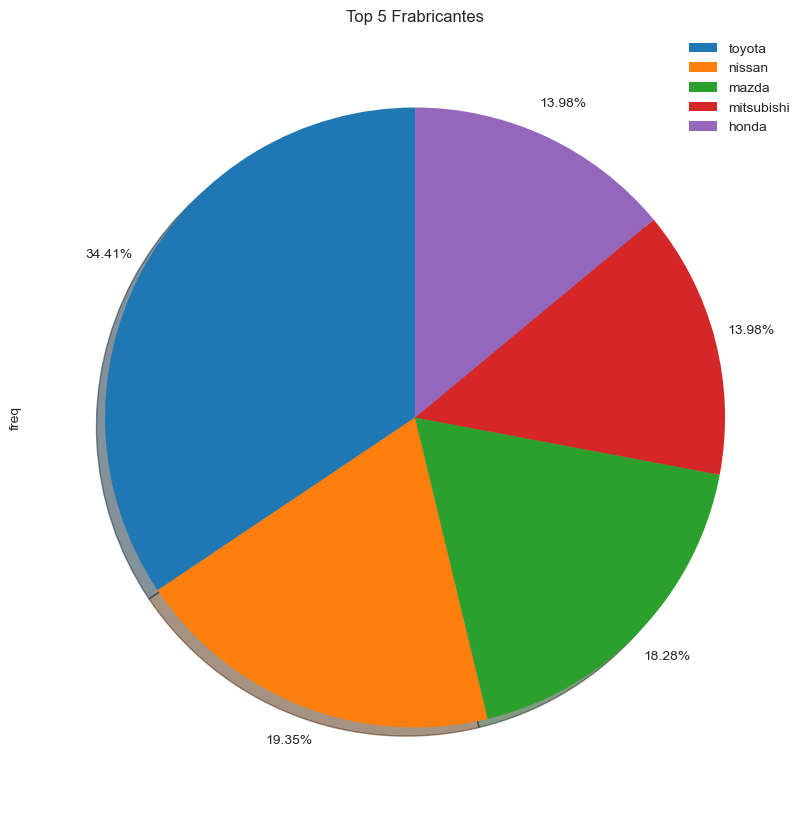

In [26]:
df_make_top['freq'].plot(
                            kind='pie'
                            ,title= 'Top 5 Frabricantes'
                            ,figsize=(10,16)
                            ,autopct='%.2f%%'
                            ,pctdistance=1.12 
                            ,startangle=90
                            ,shadow=True       
                            ,labels=None
                        )
plt.legend(labels = df_make_top.index, loc='best')

### Variáveis Quantitativas
**Gráfico de Colunas**

* Vamos avaliar a frequência da coluna `city-mpg'` já calculada anteriormente
* Para isso será criado um novo dataframe `.df_city_grouped()` para armazenar os valores
* Em seguida Criaremos um histograma

<Axes: title={'center': 'Frequência de milhas por galão'}, xlabel='MPG', ylabel='Frequência'>

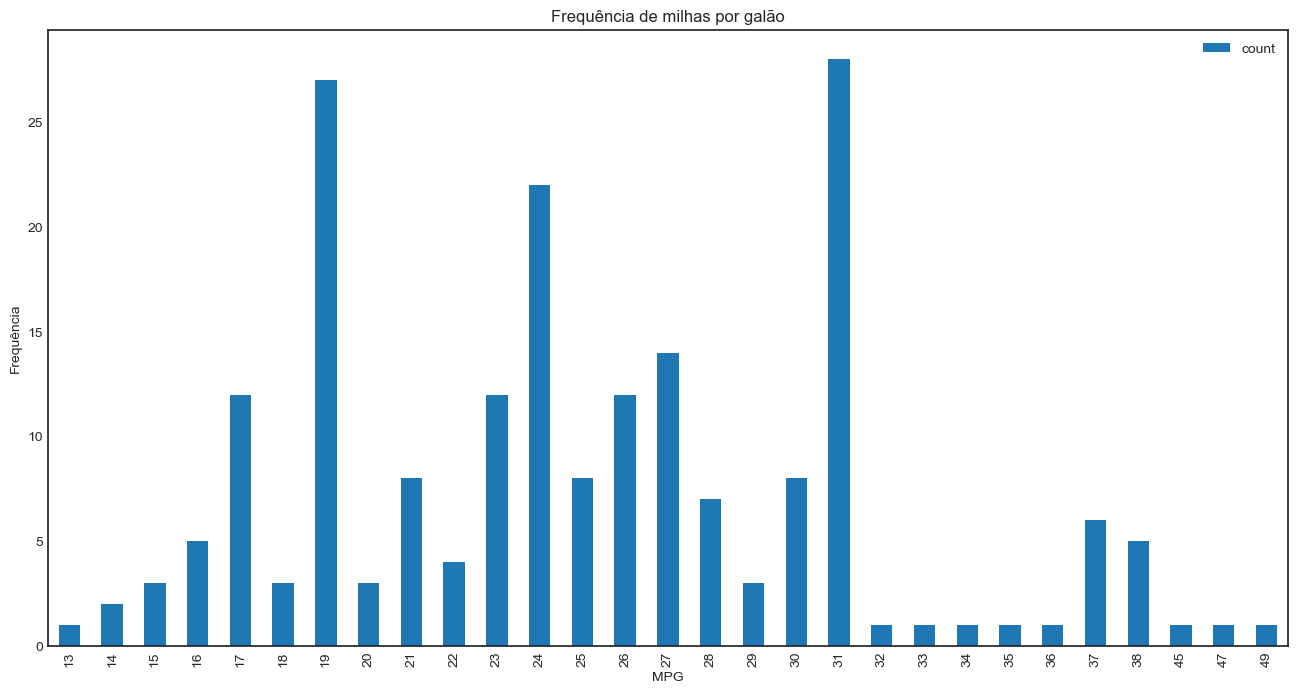

In [27]:
# Criando um dataframe com a contagem dos valores
df_city_groped = df['city-mpg'].value_counts().to_frame()

# Ordenando pelo indice do dataframe 
df_city_groped.sort_index(inplace=True)

#Criando o gráfico
df_city_groped.plot(kind='bar'
                        ,figsize=(16,8)
                        ,title="Frequência de milhas por galão"
                        ,ylabel='Frequência'
                        ,xlabel='MPG')

**Gráfico de Dispersão**
* Análise de uma variável apenas

<Axes: title={'center': 'Distribuição do consumo na cidade'}, xlabel='index', ylabel='city-mpg'>

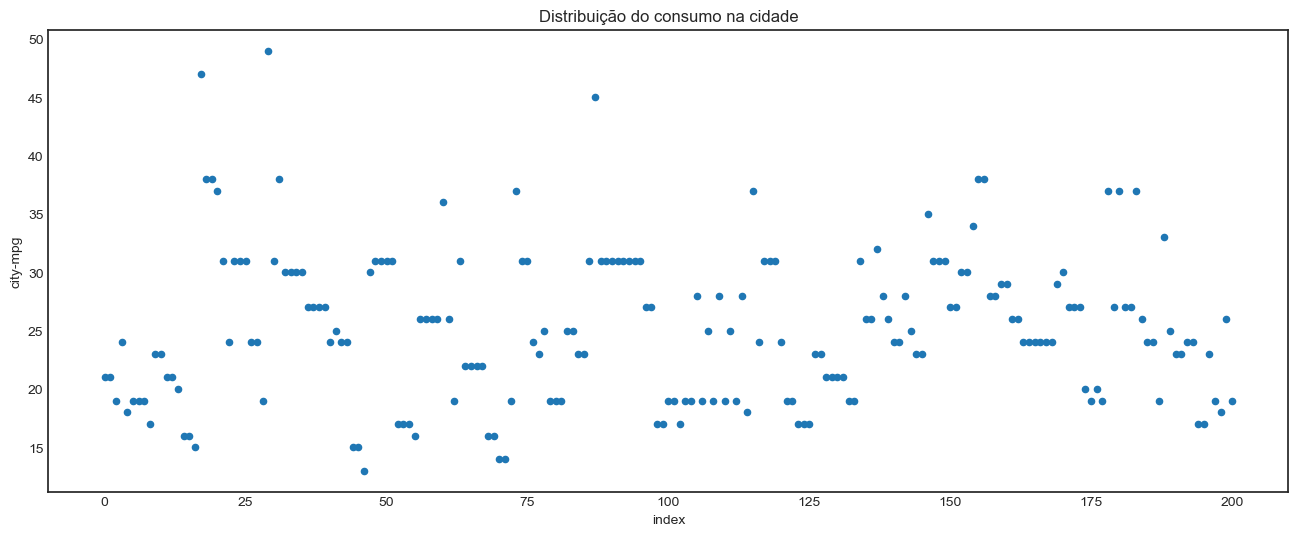

In [28]:
# Criando um novo dataframe
df_dispersao_uni = df['city-mpg'].to_frame().reset_index()

# Criando um gráfico de dispersão
df_dispersao_uni.plot(kind='scatter',x='index',y='city-mpg',title="Distribuição do consumo na cidade",figsize=(16,6))


* Análise variável independente pela dependente
* Nesse caso a variável dependente ou resposta é a `price`
* Usaremos a variável independente com sendo a `city-mpg` 

<Axes: title={'center': 'Consumo x Preço'}, xlabel='city-mpg', ylabel='price'>

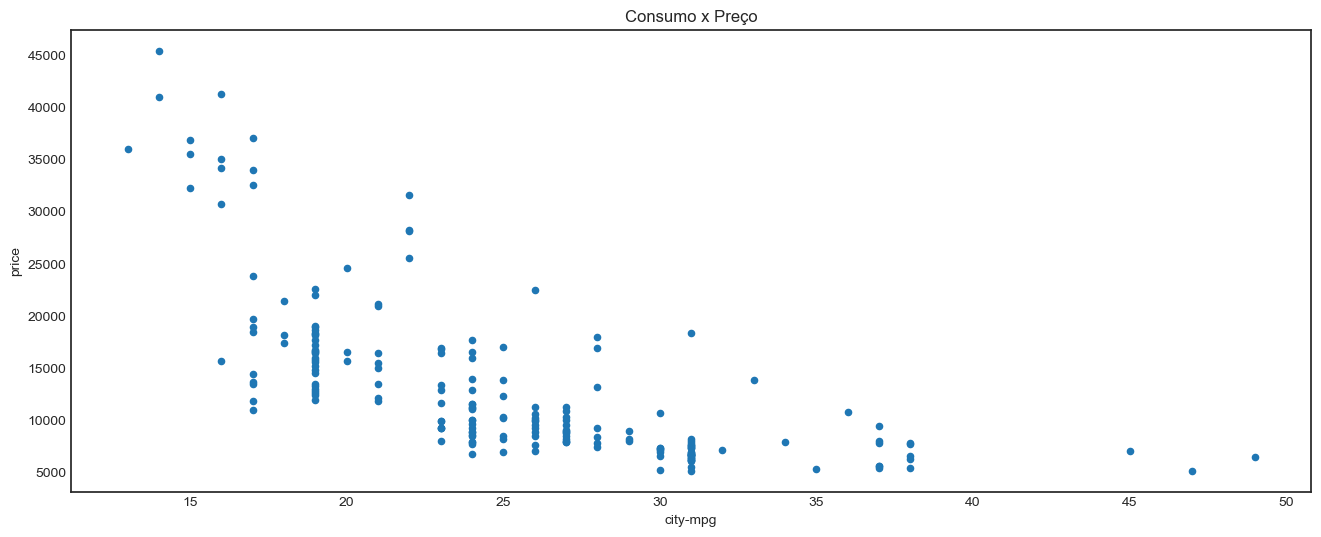

In [29]:
# Criando o novo dataframe
df_dispersao = df[['city-mpg','price']]

# Plotando o gráfico
df_dispersao.plot(
                    kind='scatter'
                    ,x='city-mpg'
                    ,y='price'
                    ,title="Consumo x Preço"
                    ,figsize=(16,6)
                    )

**Gráfico de histograma**
* Criando um gráfico de histograma com a coluna `horsepower` 
* Esse gráfico necessita de um parâmetro chamado `bins` que significa intervalo das frequências simples para variáveis quantitativas

<Axes: title={'center': 'Histograma da Potência'}, ylabel='Frequency'>

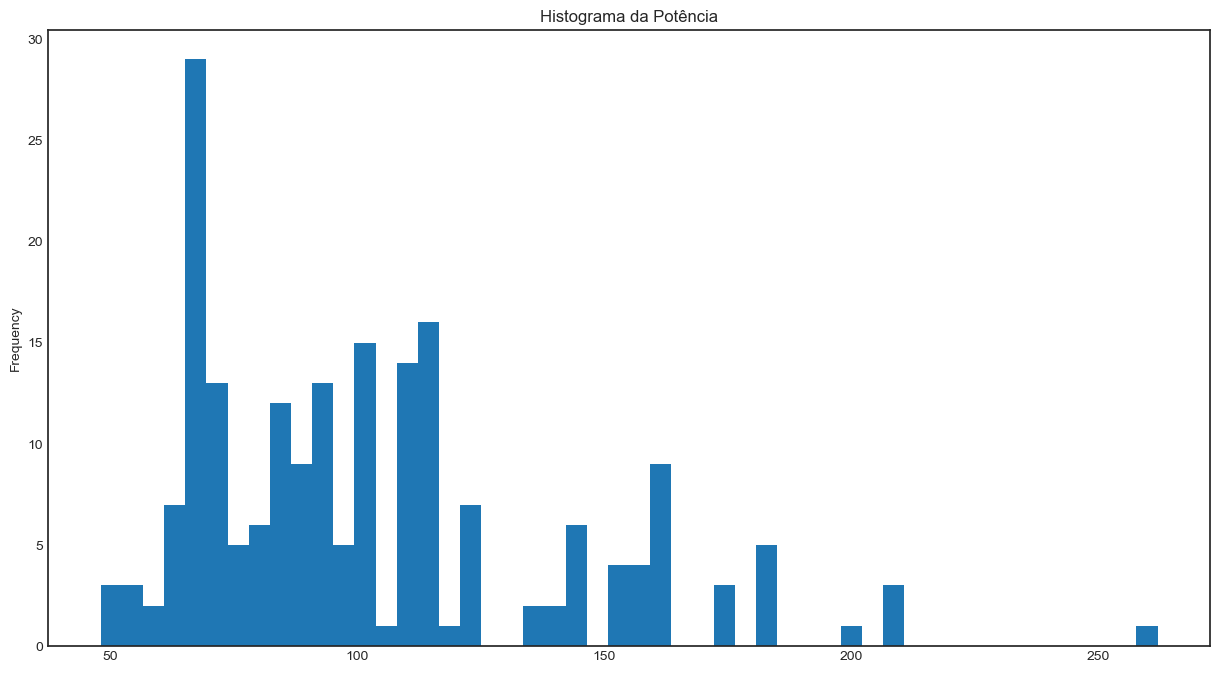

In [30]:
# Plotando o gráfico
df['horsepower'].plot(
                        kind='hist'
                        ,figsize=(15,8)
                        ,title='Histograma da Potência'
                        ,bins=50)

**Gráfico de densidade**
* Criando um gráfico de densidade com a coluna `horsepower` 

<Axes: title={'center': 'Densidade'}, ylabel='Density'>

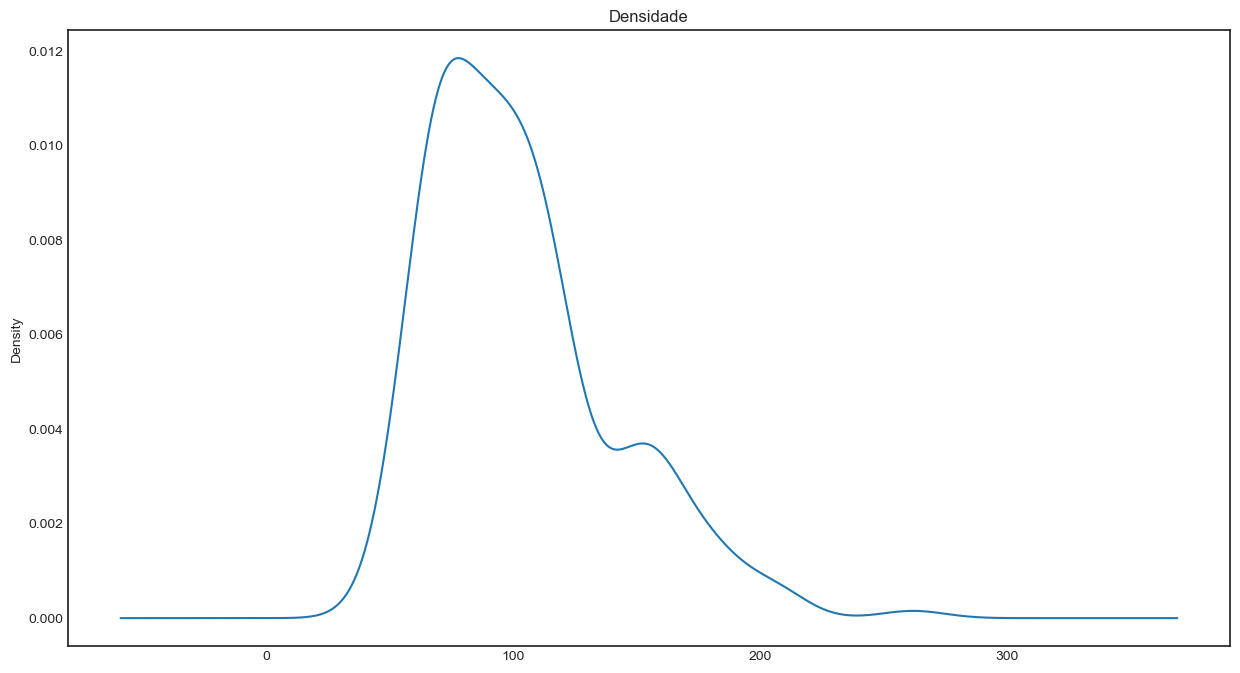

In [31]:
# Plotando o gráfico
df['horsepower'].plot(
                        kind='density'
                        ,figsize=(15,8)
                        ,title='Densidade'
                        )

**Outras formas de criar gráficos**

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>,
        <Axes: title={'center': 'engine-size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak-rpm'}>,
        <Axes: title={'center': 'city-mpg'}>,
        <Axes: title={'center': 'highway-mpg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

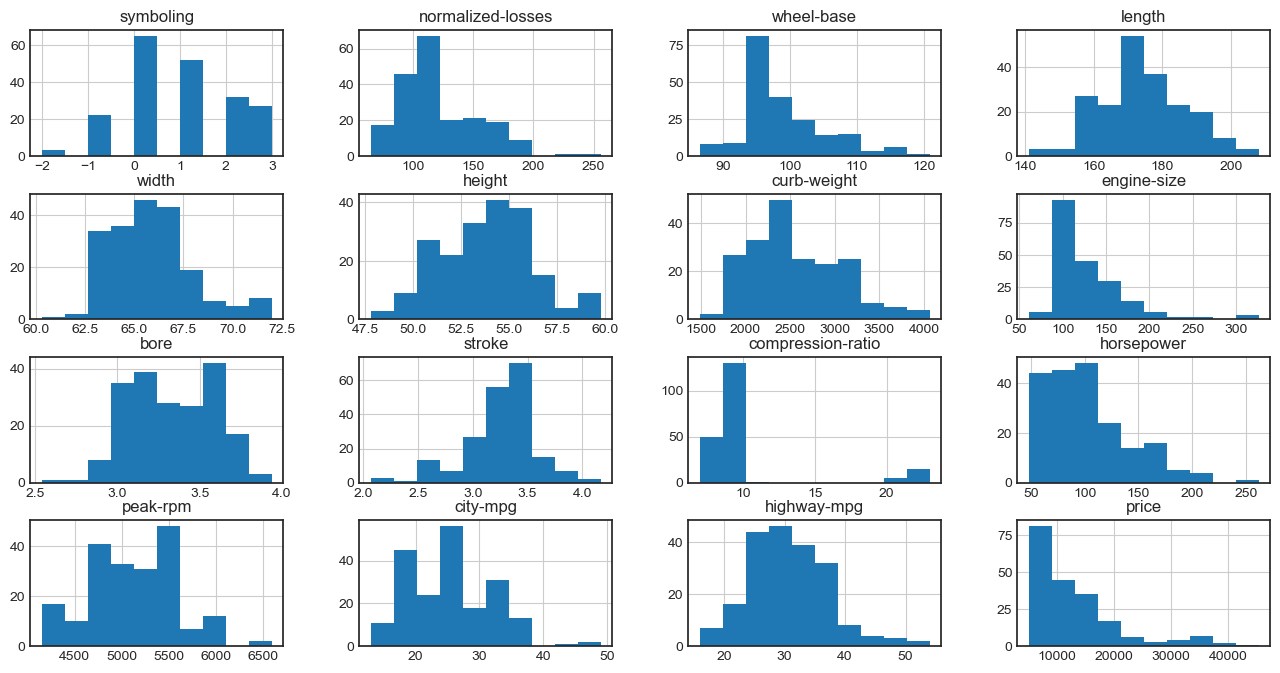

In [32]:
df.hist(figsize=(16,8))

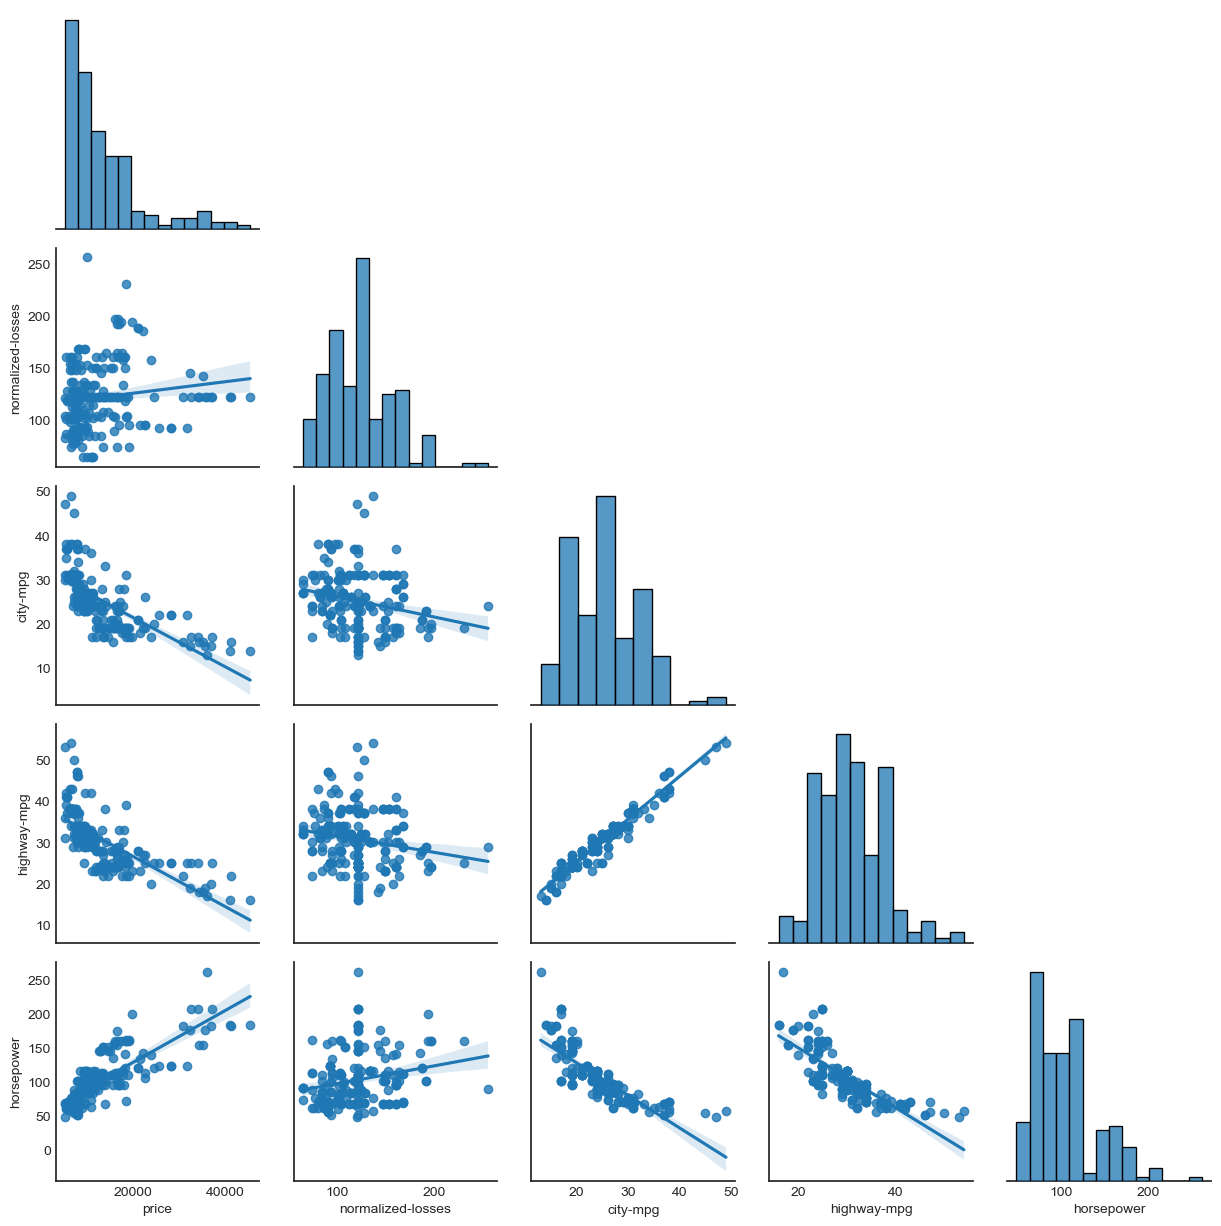

In [33]:
df_pairplot= df[['price','normalized-losses','city-mpg','highway-mpg','horsepower']]
g = sns.PairGrid(df_pairplot,diag_sharey=False, corner=True)
g.map_lower(sns.regplot)
g.map_diag(sns.histplot)

## Correlação
* A correlação varia entre -1 e 1
* Uma alta correlação é indicada quanto mais perto de 1 ou -1
* Sendo -1 uma perfeita correlação negativa 
* Sendo 1 uma perfeita correlação positiva
* Sendo 0 uma correlação nula

<Axes: >

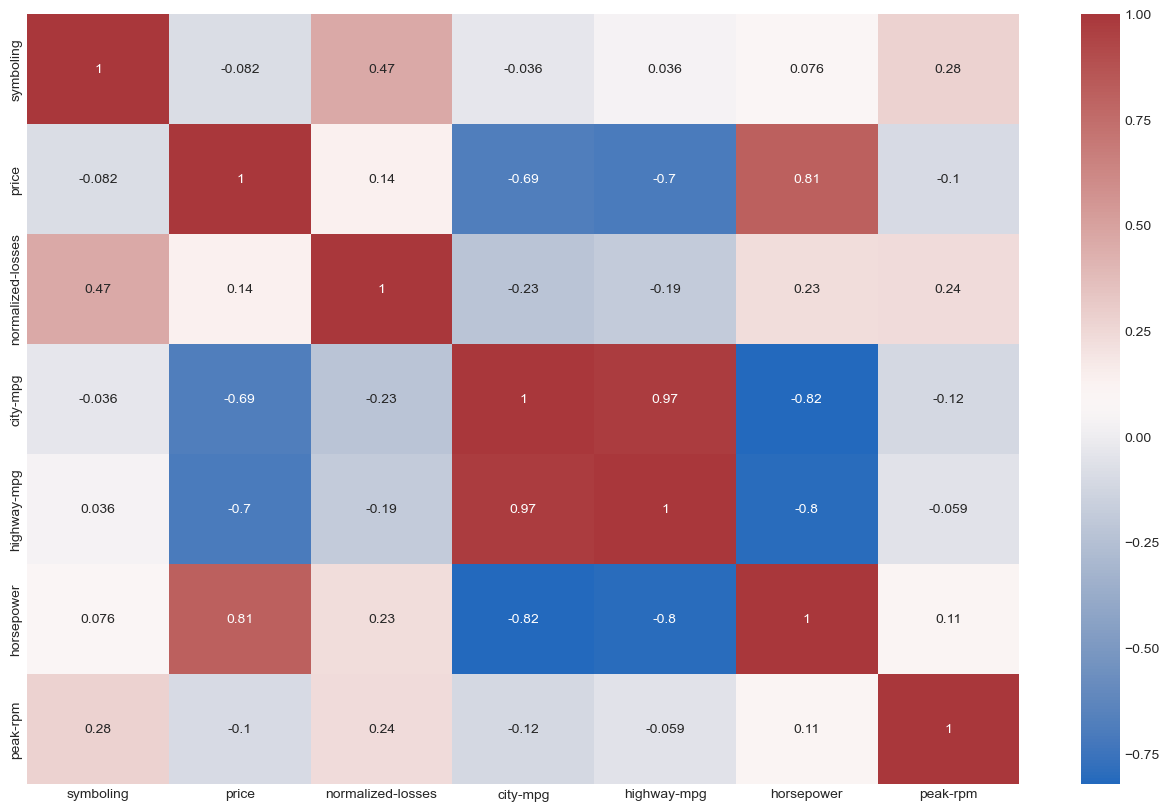

In [41]:
# Criando uma área para plotagem do gráfico
fig = plt.figure(figsize=(16,10))
ax1 = fig.subplots()

df2 = df[['symboling','price','normalized-losses','city-mpg','highway-mpg','horsepower','peak-rpm']]

# Criando um gráfico de calor
sns.heatmap(
                df2.corr()
                ,ax = ax1
                ,annot=True
                ,cmap = sns.color_palette("vlag", as_cmap=True))

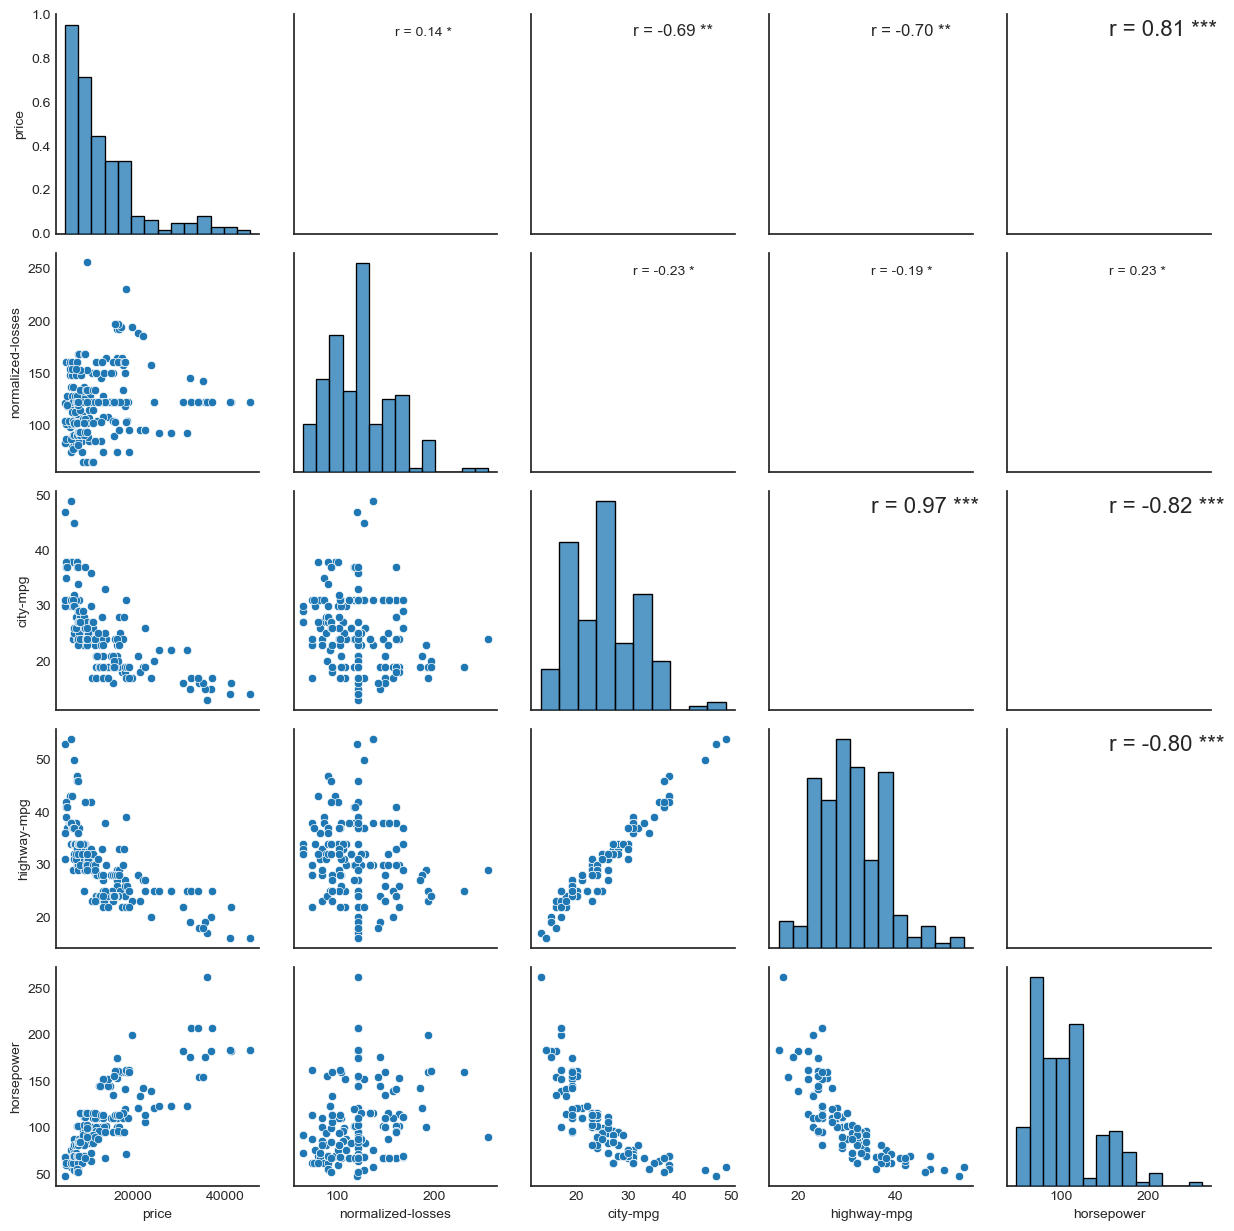

In [36]:
def corrfunc(x,y,**kws):
    
    ax = plt.gca()
    dt_corr = pd.DataFrame({'x':x,'y':y}).corr() 
    r = dt_corr.loc['x','y']
    
    correlacao ='*'
    tamanho = 10

    if r>0.8 or r <-0.8:   
        correlacao='***'
        tamanho=16         
    elif r>0.5 or r<-0.5:
        correlacao='**'
        tamanho=12

    tt = "r = %.2f " % (r) + correlacao 
    ax.annotate(tt
                , xy=(.5, .9)
                , xycoords=ax.transAxes
                , size=tamanho)

df_pairplot= df[['price','normalized-losses','city-mpg','highway-mpg','horsepower']]

g = sns.PairGrid(df_pairplot,diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_upper(corrfunc)



## Describe

* O método `.describe()` faz um resumo estatístico de todas as variáveis.

In [ ]:
df.describe(include='all')

## Referências

Inspirado e traduzido do material desenvolvido por <a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>
<br>

Documentação da biblioteca <a href="https://pandas.pydata.org/docs/">Pandas</a>

Documentação da biblioteca <a href="https://seaborn.pydata.org/">Seaborn</a>

Documentação do biblioteca <a href="https://matplotlib.org/">Matplotlib</a>

Documentação do biblioteca <a href="https://numpy.org/devdocs/reference/index.html">Numpy</a>

## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

<a href="https://www.linkedin.com/in/hesauhugocavalcanti/" target="_blank">Hesau Hugo</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ------- | ---------- | ---------------------------------- |
| 04-04-2021       | 1.0     | Eduardo Pecora    | Inicial               |
| 03-11-2021       | 1.1     | Eduardo Pecora    | Estrutura Aula        |
| 08-03-2022       | 1.2     | Eduardo Pecora    | GitHub                |
| 17-04-2023       | 1.3     | Hesau Hugo        | Reestruturação        |
| 18-03-2024       | 1.31     | Eduardo Pecora   | Correções             |